### Лабораторная работа №8 по предмету: прикладные методы и алгоритмы обработки и защиты данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Шаг 1. Считываем файл с данными в формате csv.

In [2]:
df = pd.read_csv("5000 Sales Records.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Australia and Oceania,New Zealand,Household,Offline,C,4/3/2015,217984473,4/20/2015,5305,668.27,502.54,3545172.35,2665974.70,879197.65
4996,Middle East and North Africa,Azerbaijan,Clothes,Offline,L,8/17/2014,169748055,10/2/2014,1077,109.28,35.84,117694.56,38599.68,79094.88
4997,Asia,Myanmar,Baby Food,Offline,H,11/23/2016,226939189,12/10/2016,5204,255.28,159.42,1328477.12,829621.68,498855.44
4998,Europe,Finland,Clothes,Online,L,4/22/2014,906794202,5/11/2014,9410,109.28,35.84,1028324.80,337254.40,691070.40


### Шаг 2. Подготовка данных для последующей работы с ними.
Названия столбцов были приведены к нижнему регистру. 
Также были изменены типы данных для толбцов "order date" и "ship date". С типа дыннх object на тип данных datatime для более удобной работы с этими столбцами.

In [3]:
df.columns = map(str.lower, df.columns)
df['order date'] = pd.to_datetime(df['order date'])
df['ship date'] = pd.to_datetime(df['ship date'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   region          5000 non-null   object        
 1   country         5000 non-null   object        
 2   item type       5000 non-null   object        
 3   sales channel   5000 non-null   object        
 4   order priority  5000 non-null   object        
 5   order date      5000 non-null   datetime64[ns]
 6   order id        5000 non-null   int64         
 7   ship date       5000 non-null   datetime64[ns]
 8   units sold      5000 non-null   int64         
 9   unit price      5000 non-null   float64       
 10  unit cost       5000 non-null   float64       
 11  total revenue   5000 non-null   float64       
 12  total cost      5000 non-null   float64       
 13  total profit    5000 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
me

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544,2014-01-11,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504,2010-07-26,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952,2010-06-15,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596,2015-07-27,7542,152.58,97.44,1150758.36,734892.48,415865.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Australia and Oceania,New Zealand,Household,Offline,C,2015-04-03,217984473,2015-04-20,5305,668.27,502.54,3545172.35,2665974.70,879197.65
4996,Middle East and North Africa,Azerbaijan,Clothes,Offline,L,2014-08-17,169748055,2014-10-02,1077,109.28,35.84,117694.56,38599.68,79094.88
4997,Asia,Myanmar,Baby Food,Offline,H,2016-11-23,226939189,2016-12-10,5204,255.28,159.42,1328477.12,829621.68,498855.44
4998,Europe,Finland,Clothes,Online,L,2014-04-22,906794202,2014-05-11,9410,109.28,35.84,1028324.80,337254.40,691070.40


### Шаг 3. Исследование и анализ данных.

### Пункт 1. Для регионов.

1.1 Выявление регион с самым большим и самым маленьким Total Cost, Total Revenue,
Total Profit

In [4]:
#chek = ["total cost", "total revenue", "total profit"]
#df.groupby('region')[chek].min()

# Поиск минимальных значений для регионов
region_sales_min = df.pivot_table(index=['region'], values=('total revenue', 'total cost', 'total profit'), aggfunc='sum').sort_values('region', ascending=False)
region_sales_min = region_sales_min.reset_index()

region_sales_min


,region,total cost,total profit,total revenue
0,Sub-Saharan Africa,1.283425e+09,5.311423e+08,1.814567e+09
1,North America,1.097739e+08,4.124040e+07,1.510143e+08
2,Middle East and North Africa,5.354875e+08,2.313803e+08,7.668678e+08
3,Europe,1.201946e+09,5.016760e+08,1.703622e+09
4,Central America and the Caribbean,4.803643e+08,2.046120e+08,6.849763e+08
5,Australia and Oceania,4.124295e+08,1.749346e+08,5.873641e+08
6,Asia,6.420394e+08,2.782377e+08,9.202771e+08


In [5]:
# Поиск максимальных значений для регионов
region_sales_max = df.pivot_table(index=['region'], values=('total revenue', 'total cost', 'total profit'), aggfunc='sum').sort_values('region', ascending=True)
region_sales_max = region_sales_max.reset_index()
region_sales_max

,region,total cost,total profit,total revenue
0,Asia,6.420394e+08,2.782377e+08,9.202771e+08
1,Australia and Oceania,4.124295e+08,1.749346e+08,5.873641e+08
2,Central America and the Caribbean,4.803643e+08,2.046120e+08,6.849763e+08
3,Europe,1.201946e+09,5.016760e+08,1.703622e+09
4,Middle East and North Africa,5.354875e+08,2.313803e+08,7.668678e+08
5,North America,1.097739e+08,4.124040e+07,1.510143e+08
6,Sub-Saharan Africa,1.283425e+09,5.311423e+08,1.814567e+09


1.2 Выявление регион с самым большим и самым маленьким Units Sold, Unit Price, Unit
Cost

In [6]:
# Поиск минимальных значений для регионов
region_sales_min_1 = df.pivot_table(index=['region'], values=('units sold', 'unit price', 'unit cost'), aggfunc='sum').sort_values('region', ascending=False)
region_sales_min_1 = region_sales_min_1.reset_index()

region_sales_min_1

,region,unit cost,unit price,units sold
0,Sub-Saharan Africa,246882.89,349025.54,6642380
1,North America,22288.68,31107.34,484760
2,Middle East and North Africa,110155.63,157454.57,3013431
3,Europe,249038.26,352308.41,6582322
4,Central America and the Caribbean,97945.33,138441.97,2698776
5,Australia and Oceania,82580.72,116833.27,2111786
6,Asia,128579.21,183556.72,3620036


In [7]:
# Поиск максимальных значений для регионов
region_sales_max_1 = df.pivot_table(index=['region'], values=('units sold', 'unit price', 'unit cost'), aggfunc='sum').sort_values('region', ascending=True)
region_sales_max_1 = region_sales_max_1.reset_index()
region_sales_max_1

,region,unit cost,unit price,units sold
0,Asia,128579.21,183556.72,3620036
1,Australia and Oceania,82580.72,116833.27,2111786
2,Central America and the Caribbean,97945.33,138441.97,2698776
3,Europe,249038.26,352308.41,6582322
4,Middle East and North Africa,110155.63,157454.57,3013431
5,North America,22288.68,31107.34,484760
6,Sub-Saharan Africa,246882.89,349025.54,6642380


1.3 Построение зависимости региона от типа продаж.

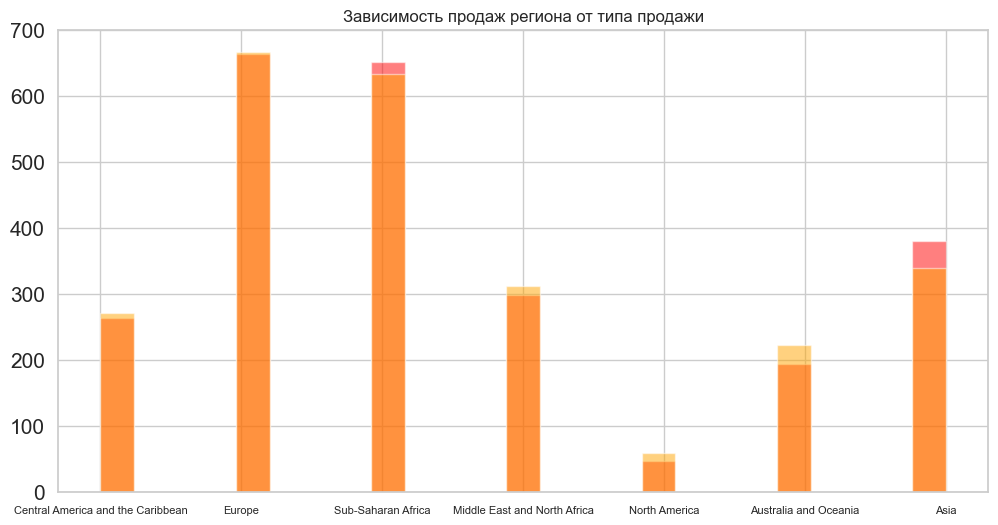

In [8]:
# Выделим для начала основные пересенные, нужные для анализа
online = df[df['sales channel'] == 'Online']
offline = df[df['sales channel'] == 'Offline']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(online['region'], color='red',alpha=0.5, linewidth=1, label='online', align='mid', bins=25)
plt.hist(offline['region'], color='orange',alpha=0.5, linewidth=1, label='offline', align='mid', bins=25)
plt.xticks(fontsize=8)
plt.yticks(fontsize=15)
plt.title('Зависимость продаж региона от типа продажи')

plt.show()

1.4 Разделяем таблицу по Item Type — продовольственные и не продовольственные
товары

In [9]:
# выделяем элементы еды по типам, а также онлайн
food_onl = df[((df['item type'] == 'Baby Food') | (df['item type'] == 'Snacks') | (df['item type'] == 'Beverages') | (df['item type'] == 'Cereal') | (df['item type'] == 'Meat') | (df['item type'] == 'Fruits') | (df['item type'] == 'Vegetables')) & (df['sales channel'] == 'Online')]

food_offl = df[((df['item type'] == 'Baby Food') | (df['item type'] == 'Snacks') | (df['item type'] == 'Beverages') | (df['item type'] == 'Cereal') | (df['item type'] == 'Meat') | (df['item type'] == 'Fruits') | (df['item type'] == 'Vegetables')) & (df['sales channel'] == 'Offline')]


In [10]:
# выделяем элементы по типам, онлайн
items_onl = df[((df['item type'] == 'Personal Care') | (df['item type'] == 'Clothes') | (df['item type'] == 'Office Supplies') | (df['item type'] == 'Cosmetics') | (df['item type'] == 'Household')) & (df['sales channel'] == 'Online')]
items_onl

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit
7,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013-10-14,919133651,2013-11-04,927,109.28,35.84,101302.56,33223.68,68078.88
11,Middle East and North Africa,Oman,Cosmetics,Online,M,2013-05-12,741101920,2013-05-17,7382,437.20,263.33,3227410.40,1943902.06,1283508.34
17,Europe,Bulgaria,Office Supplies,Online,L,2010-10-31,672330081,2010-11-29,6266,651.21,524.96,4080481.86,3289399.36,791082.50
27,Central America and the Caribbean,Guatemala,Office Supplies,Online,M,2012-01-17,345820701,2012-02-01,4885,651.21,524.96,3181160.85,2564429.60,616731.25
32,Middle East and North Africa,Oman,Clothes,Online,H,2011-07-03,557192933,2011-07-05,4626,109.28,35.84,505529.28,165795.84,339733.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,Sub-Saharan Africa,Eritrea,Office Supplies,Online,H,2015-03-07,354593455,2015-04-03,938,651.21,524.96,610834.98,492412.48,118422.50
4983,Asia,South Korea,Clothes,Online,M,2010-07-03,422709548,2010-08-04,8004,109.28,35.84,874677.12,286863.36,587813.76
4986,Asia,Sri Lanka,Office Supplies,Online,C,2012-12-01,307045400,2012-12-02,412,651.21,524.96,268298.52,216283.52,52015.00
4988,Middle East and North Africa,United Arab Emirates,Household,Online,H,2014-08-31,925384271,2014-10-12,625,668.27,502.54,417668.75,314087.50,103581.25


In [11]:
# выделяем элементы по типам, оффлайн
items_offl = df[((df['item type'] == 'Personal Care') | (df['item type'] == 'Clothes') | (df['item type'] == 'Office Supplies') | (df['item type'] == 'Cosmetics') | (df['item type'] == 'Household')) & (df['sales channel'] == 'Offline')]
items_offl

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit
5,Middle East and North Africa,Morocco,Personal Care,Offline,L,2010-11-08,412882792,2010-11-22,48,81.73,56.67,3923.04,2720.16,1202.88
6,Australia and Oceania,Federated States of Micronesia,Clothes,Offline,H,2011-03-28,932776868,2011-05-10,8258,109.28,35.84,902434.24,295966.72,606467.52
8,Middle East and North Africa,Afghanistan,Clothes,Offline,M,2016-08-27,579814469,2016-10-05,8841,109.28,35.84,966144.48,316861.44,649283.04
10,Middle East and North Africa,Turkey,Office Supplies,Offline,C,2013-09-25,557156026,2013-10-15,3704,651.21,524.96,2412081.84,1944451.84,467630.00
13,Central America and the Caribbean,Saint Lucia,Cosmetics,Offline,H,2015-07-06,795100581,2015-07-16,6786,437.20,263.33,2966839.20,1786957.38,1179881.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,Middle East and North Africa,Iran,Clothes,Offline,L,2014-07-11,927583253,2014-08-30,1352,109.28,35.84,147746.56,48455.68,99290.88
4993,Europe,Denmark,Clothes,Offline,H,2012-05-09,713357150,2012-06-03,7088,109.28,35.84,774576.64,254033.92,520542.72
4994,Sub-Saharan Africa,Liberia,Cosmetics,Offline,M,2012-06-17,374724614,2012-06-23,8195,437.20,263.33,3582854.00,2157989.35,1424864.65
4995,Australia and Oceania,New Zealand,Household,Offline,C,2015-04-03,217984473,2015-04-20,5305,668.27,502.54,3545172.35,2665974.70,879197.65


1.5 Построить график по доходу от продаж по типам товаров в зависимости от типа
продажи 

## Разделение таблицы по типам товаров

In [12]:
# Записываем для себя значения цен по прадажам онлайн/оффлайн суммы продаж 
food_onl_sales = food_onl.pivot_table(index=['item type'], values=('sales channel'), aggfunc='count').sort_values('item type', ascending=False)
food_onl_sales = food_onl_sales.reset_index()
food_offl_sales = food_offl.pivot_table(index=['item type'], values=('sales channel'), aggfunc='count').sort_values('item type', ascending=False)
food_offl_sales = food_offl_sales.reset_index()
items_onl_sales = items_onl.pivot_table(index=['item type'], values=('sales channel'), aggfunc='count').sort_values('item type', ascending=False)
items_onl_sales = items_onl_sales.reset_index()
items_offl_sales = items_offl.pivot_table(index=['item type'], values=('sales channel'), aggfunc='count').sort_values('item type', ascending=False)
items_offl_sales = items_offl_sales.reset_index()

## Построение графика зависимости продаж от их типа(онлайн-оффлайн) по типу товара

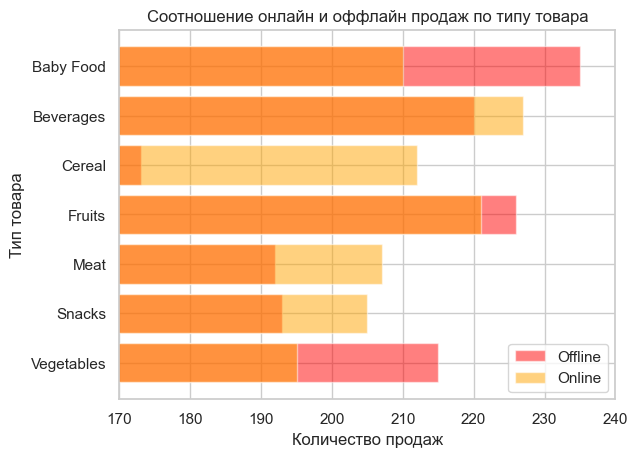

In [13]:
plt.grid()
plt.barh(food_offl_sales['item type'], food_offl_sales['sales channel'], alpha = 0.5, color = 'red', label = 'Offline')
plt.barh(food_onl_sales['item type'], food_onl_sales['sales channel'], alpha = 0.5, color = 'orange', label = 'Online')
plt.legend()
plt.xlim(170, 240)
plt.ylabel('Тип товара')
plt.xlabel('Количество продаж')
plt.title('Соотношение онлайн и оффлайн продаж по типу товара')
plt.grid(True)
plt.show()

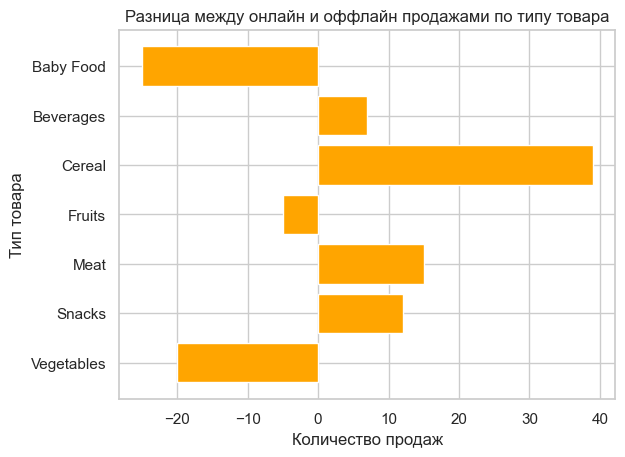

In [14]:
plt.grid()
plt.barh(food_onl_sales['item type'], food_onl_sales['sales channel'] - food_offl_sales['sales channel'], color = 'orange')
plt.ylabel('Тип товара')
plt.xlabel('Количество продаж')
plt.title('Разница между онлайн и оффлайн продажами по типу товара')
plt.grid(True)
plt.show()

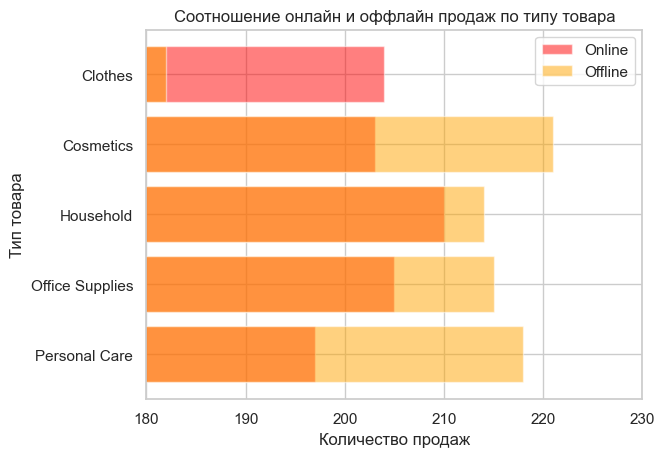

In [15]:
plt.grid()
plt.barh(items_onl_sales['item type'], items_onl_sales['sales channel'], alpha = 0.5, color = 'red', label = 'Online')
plt.barh(items_offl_sales['item type'], items_offl_sales['sales channel'], alpha = 0.5, color = 'orange', label = 'Offline')
plt.legend()
plt.xlim(180, 230)
plt.ylabel('Тип товара')
plt.xlabel('Количество продаж')
plt.title('Соотношение онлайн и оффлайн продаж по типу товара')
plt.grid(True)
plt.show()

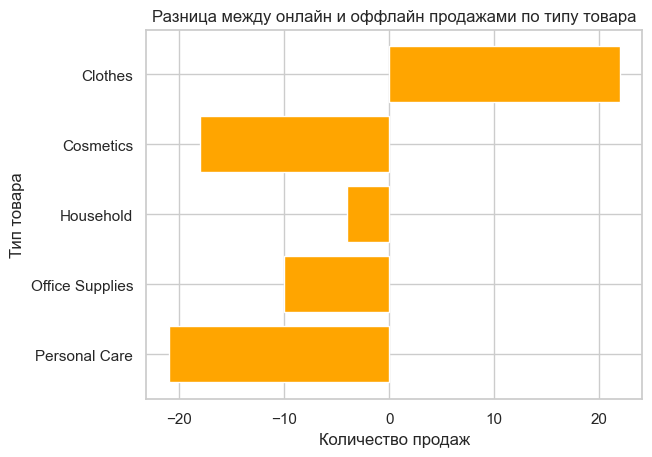

In [16]:
plt.grid()
plt.barh(items_onl_sales['item type'], items_onl_sales['sales channel'] - items_offl_sales['sales channel'], color = 'orange')
plt.ylabel('Тип товара')
plt.xlabel('Количество продаж')
plt.title('Разница между онлайн и оффлайн продажами по типу товара')
plt.grid(True)
plt.show()

1.7 Выявление зависмость длинтельности срока отгрузки от регоина. Посчитать средний
срок отгрузки по региноу.

## Вычисление среднего времени доставки по регионам

In [17]:
delivery = pd.DataFrame(df['region'])
delivery['time'] = df['ship date'] - df['order date']

In [18]:
delivery_time = delivery.pivot_table(index=['region'], values=('time'), aggfunc='mean').sort_values('time', ascending=False)
delivery_time = delivery_time.reset_index()
delivery_time

,region,time
0,North America,25 days 13:48:40.754716981
1,Sub-Saharan Africa,25 days 10:57:48.326848249
2,Middle East and North Africa,25 days 05:06:53.114754098
3,Asia,25 days 03:28:17.357440890
4,Central America and the Caribbean,24 days 21:55:57.303370786
5,Europe,24 days 18:37:21.203007518
6,Australia and Oceania,24 days 06:10:23.076923077


## Определение распеределения количества заказов от Order Priority

1.8 Построить график распеределения количества заказов от Order Priority.

In [19]:
order = df.pivot_table(index=['order priority'], values=('region'), aggfunc='count').sort_values('region', ascending=False)
order = order.reset_index()
order

,order priority,region
0,M,1321
1,H,1278
2,L,1227
3,C,1174


## Построение графика среднего времени доставки по регионам

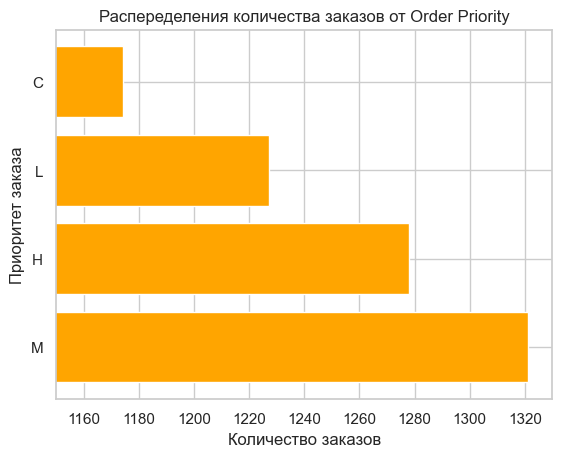

In [20]:
plt.grid()
plt.barh(order['order priority'], order['region'], color = 'orange')
plt.title('Распеределения количества заказов от Order Priority')
plt.xlabel('Количество заказов')
plt.ylabel('Приоритет заказа')
plt.xlim(1150, 1330)
plt.grid(True)
plt.show()